In this notebook we want to classify mnist dataset using decision tree algorithm (ID3 on features). we have several problems as below :


1.   mnist dataset of sklearn have 60k matrices of 28*28 pixel or 1*784 dimens.
  if we consider each pixel a feature then there would be less accuracy and more time cost.


for the first issue we have two options : 


1.   reducing features (reducing data dimens)
2.   using less data.

and ofcourse the first one is better choice.




we start with adding dependencies ⚓

In [ ]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sklearn.__version__


'0.22.2.post1'

lets import mnist dataset:


In [ ]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


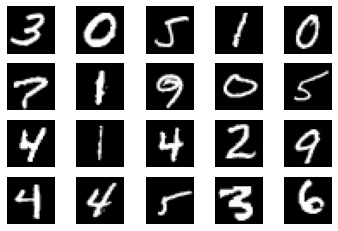

In [ ]:
import random
#show 20 random images from the data set
n_images = X_train.shape[0]
n_rows=4
n_cols=5

for i in range(1,n_rows*n_cols+1):
    im_idx = random.randint(0,n_images-1)
    pixels=X_train[im_idx]
    plt.subplot(n_rows, n_cols, i)
    plt.imshow(pixels, cmap='gray')
    plt.axis('off')
plt.show()

lets calculate entropy of our train dataset. </br>
The entropy is 3.31 and that's because we have 10 classes with different ratio. </br>
p.s. this is shanon entropy with base 2.

In [ ]:
import pandas as pd
from scipy.stats import entropy
pd_series = pd.Series(Y_train)
counts = pd_series.value_counts()/60000
print(counts)
entropy = entropy(counts,base=2)

print(entropy)

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
dtype: float64
3.3198709267551885


Since our decision tree classifier needs a feature vector to operate, we need to convert the 28*28 matrix to 1*784 feature vector which each pixel represent a feature . </br>
lets reshape our matrix and then print it .

In [ ]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# investigate the size of the feature matrices
print(X_train.shape)
print(X_test.shape)
# inspect one example
print(X_train[1])

(60000, 784)
(10000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0. 

As it is printed, not all the pixels give us informations about classifying.(most of edges have 0 value ) </br>
So all the 784 feature is not usefull for decision tree and they will consume a lot of time. what we need to to is reducing and deleting those useless features.
but for more clear demonstration of this issue, I want to train the algorithm with all the 784 feature and then measure its accuracy .

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
clf_dt = DecisionTreeClassifier();
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now, let's see how well this model performs on the test set.

In [ ]:
# make predictions with the decision tree classifier
y_test_pred_dt = clf_dt.predict(X_test)
a_dt = accuracy_score(y_test, y_test_pred_dt)
print(a_dt)

0.8753


It approximately achieved the accuracy of %88 .

Lets improve accuracy by changing parameters of decision tree :

In [ ]:
clf_dt2 = DecisionTreeClassifier(criterion="entropy",splitter="random");
clf_dt2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
y_test_pred_dt2 = clf_dt2.predict(X_test)
a_dt2 = accuracy_score(y_test, y_test_pred_dt2)
print(a_dt2)

0.8852


In [ ]:
clf_dt3 = DecisionTreeClassifier(criterion="entropy",splitter="best",min_samples_split=10);
clf_dt3.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_test_pred_dt3 = clf_dt3.predict(X_test)
a_dt3 = accuracy_score(y_test, y_test_pred_dt3)
print(a_dt3)

0.8833


As shown above , with changing information gain parameter from *gini* to 
*entropy* and using random split we improve the accuracy a bit.

Now , let's improve the accuracy using Dimensionality Reduction (TSVD and t-SNE).

In [ ]:
from sklearn.decomposition import TruncatedSVD
# Perform Truncated Singular Value Decomposition (TSVD) on all features
# This will reduce the amount of features to 50 and will simplify t-SNE
tsvd = TruncatedSVD(n_components=50).fit_transform(X_train)

In [ ]:
tsvd.shape

(60000, 50)

We reduced the dimension to 50. Now let's train the model .

In [ ]:
clf_dt = DecisionTreeClassifier();
clf_dt.fit(tsvd,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

For predicting the test data set we need to reduce the x_test dimens to 50 as well.( because model were trained with 50 feature !!)

In [ ]:
test_tsvd= TruncatedSVD(n_components=50).fit_transform(X_test)


In [ ]:
y_test_pred_dt_tsvd = clf_dt.predict(test_tsvd)
accuracy_tsvd_dt = accuracy_score(y_test,y_test_pred_dt_tsvd)
print(accuracy_tsvd_dt )

ValueError: ignored

We can see that by applying TSVD we lose information and the same decision tree classifier leads to a worse performance. However, we will see later that after applying t-SNE and using those features the same deicision tree classifier will lead to remarkable results.

After compressing the 784 pixel features to 50 features we train the t-SNE algorithm. Note that we can train the algorithm on the train and testing data combined. We don't need the target because of t-SNE's unsupervised nature.

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()
transformed = tsne.fit_transform(tsvd) 

Besides compressing data and making simple algorithms more effective on high-dimensional data, t-SNE can also be used to create intuitive and beautiful visualizations of data. As you can see in the graph below the classes are clearly distinct from each other when compressed into a 2-dimensional space. Also, images that are similar like 3 and 9 are closer to each other than 0 and 7. In the MNIST dataset, some 7's look pretty much like a 1 and this is reflected in the t-SNE visualization.

A downside of creating a classifiers using compressed data can be that a model like a decision tree becomes less interpretable. We don't know which specific feature influences the result because all features are made up of a combination of features. We can counter this by compressing groups of features that have a similar meaning and have a high correlation with each other.

In [ ]:
test_transformed=tsne.fit_transform(test_tsvd)

We transformed our data and reduced their dimentions with TSVD + TSNE. Now lets train new model.

In [ ]:
clf_dt = DecisionTreeClassifier();
clf_dt.fit(transformed,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
transformed.shape

(60000, 2)

In [ ]:
train_preds = clf_dt.predict(transformed)
val_preds = clf_dt.predict(test_transformed)
acc_tsvd_train = accuracy_score(train_preds, y_train)
acc_tsvd_val = accuracy_score(val_preds, y_test)
print(f'Training accuracy with TSVD features (50 components): {acc_tsvd_train}%')
print(f'Validation accuracy with TSVD features (50 components): {acc_tsvd_val}%')


Training accuracy with TSVD features (50 components): 1.0%
Validation accuracy with TSVD features (50 components): 0.1999%


Based on [this article](https://www.kaggle.com/carlolepelaars/97-on-mnist-with-a-single-decision-tree-t-sne) we supposed to get more than 95% with combining TSVD and TSNE methods for feature reduction but unfortunately we lost accuracy and I need more reasearch on these methods to see what is the problem .